from https://github.com/rafaeloliveira00/iperf3-plotter/blob/master/iperf_plotter.py

In [1]:
import json
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
plt.rcParams['figure.dpi'] = 600

In [28]:
def read_iperf3_json(file: str):
    with open(file) as json_file:
        json_data = json.load(json_file)
    
    time_intervals = json_data['intervals']
    time_intervals_sum = [item['sum'] for item in time_intervals]
        
    bits_per_second = [item['bits_per_second'] / 1000000 for item in time_intervals_sum]
    
    return bits_per_second


In [31]:
len(read_iperf3_json("precomputed.json"))

589

In [35]:
len(read_iperf3_json("realtime-ns3.json")[7:])


589

In [36]:
df = pd.DataFrame({'Precalculated': read_iperf3_json("precomputed.json"), 'Simulated': read_iperf3_json("realtime-ns3.json")[7:]})
df

,Precalculated,Simulated
0,4.190043,23.059241
1,22.034418,23.078180
2,15.718454,23.059309
3,17.825792,22.019986
4,22.020118,23.078135
...,...,...
584,0.000000,0.000000
585,0.000000,0.000000
586,0.000000,0.000000
587,0.000000,0.000000


<Axes: xlabel='Time (s)', ylabel='Throughput (MBit/s)'>

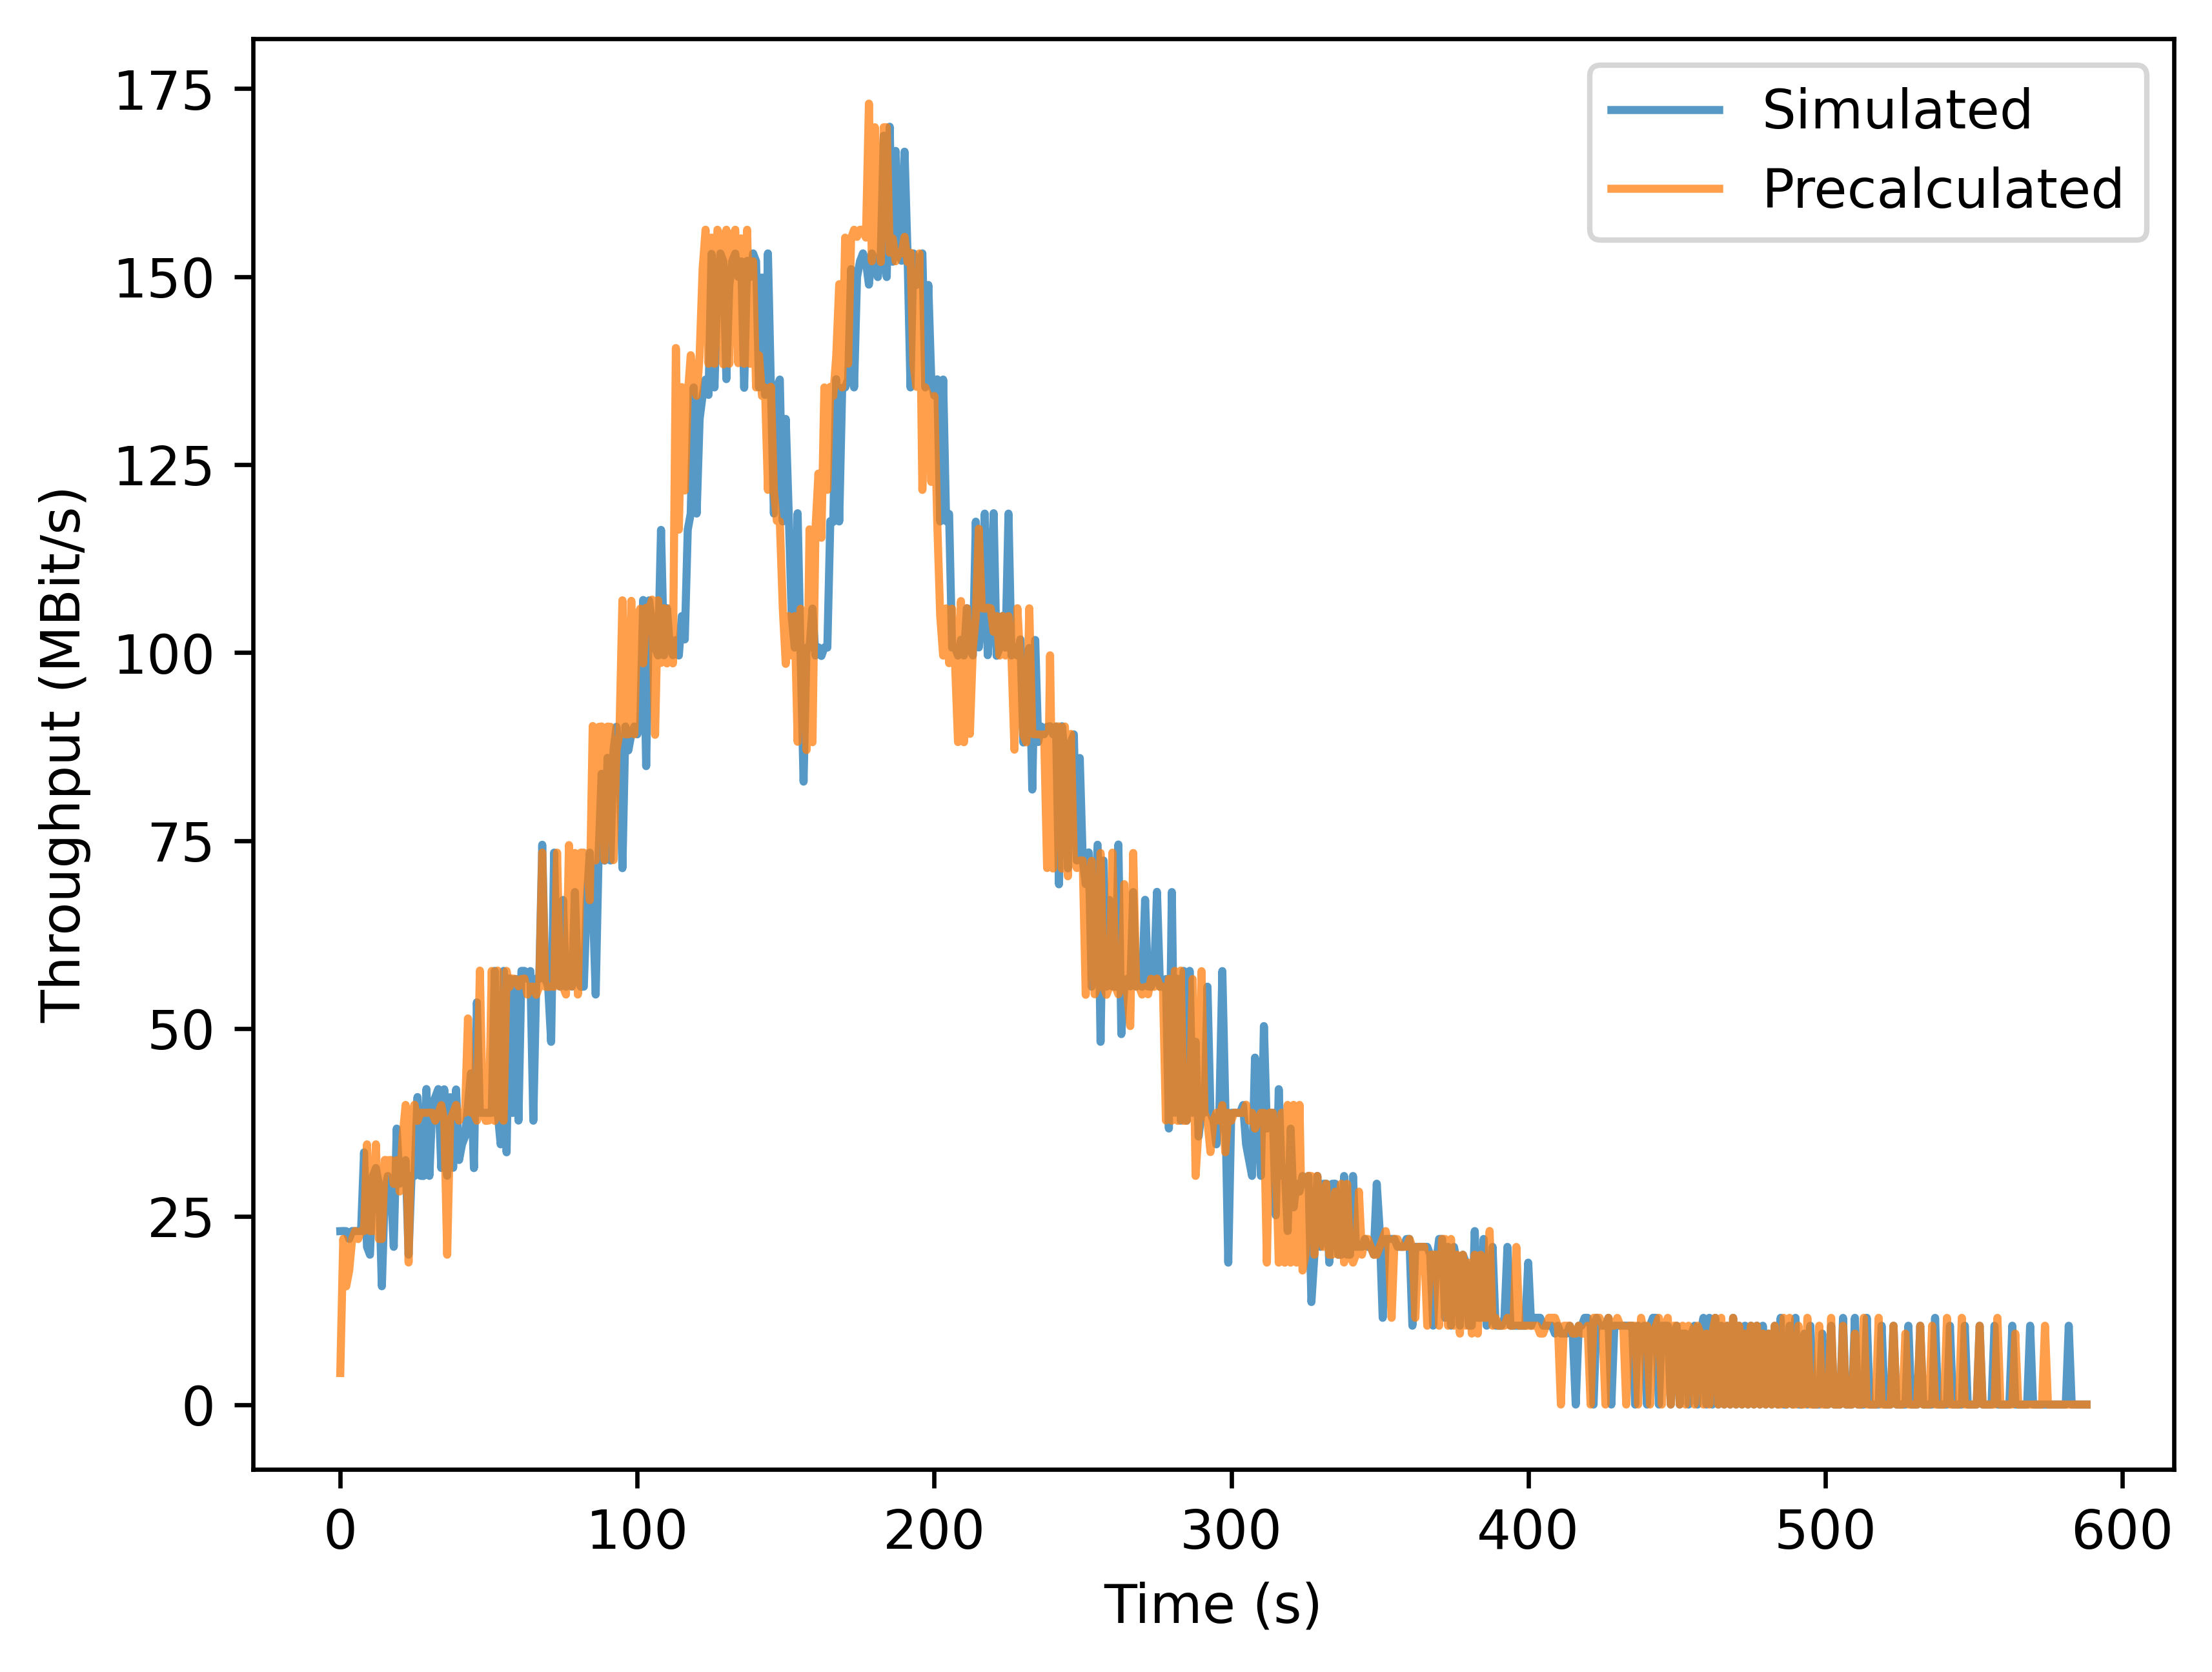

In [38]:
df.plot(y=["Simulated", "Precalculated"], ylabel="Throughput (MBit/s)", xlabel="Time (s)", alpha=0.75)